In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
#import model package
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [2]:
df = pd.read_csv("data.csv", encoding = "utf-16")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1004985 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

In [4]:
for i in range(1, len(df.columns)):
    name = df.columns[i]
    print(len(df[name].unique()), name, df[name].unique())
    print("---------------------------------------------")

4553 house [101006101 101014101 101030101 ... 965084801 965085701 965086701]
---------------------------------------------
7 weekday [1 2 4 3 6 5 7]
---------------------------------------------
3 trade ['MT' 'TT' 'Not Specified']
---------------------------------------------
12 channel ['SUPERMARKETS' 'GIFTING' 'HYPERMARKETS' 'PROVISION ST' 'CONVENIENCE ST'
 'GROCERIES' 'DRUG STORES' 'OTHERS' 'DIRECT SALES' 'ONLINE SHOP'
 'PERSONAL CARE ST' 'DEPARTMENT ST']
---------------------------------------------
68 Store ['Other' 'Puregold Hypermarket' 'Water Refilling Station' 'SM Hypermarket'
 'Ever' 'Sari-sari stores' 'Peddlers' '7-Eleven' 'New South Star Drug'
 'Mercury Drug' 'SM Save More' 'SM Supermarket' 'Waltermart' 'Landmark'
 'Super 8' 'Puregold Jr' "Robinson's" 'Alfa Mart' "Liana's"
 'Market Stalls' 'Shopwise' 'South Supermarket' 'Bakery/Bakeshop'
 'Other Provision St.' 'Metro Market Gaisano' 'Ministop' 'Tropical Hut'
 'Isetan' 'Citimart' 'Puregold Extra' 'Nesabel' 'S&R Pricemart' "R

3259 REFID ['REFID06202150524077195004000' 'REFID05902060006002002005000'
 'REFID06802040083003006000000' ... 'REFID46400010103001007010001'
 'REFID46404120213002005011001' 'REFID06200010101001008004000']
---------------------------------------------
7 CAT ['INSTANT COFFEE' 'LIQUID / RTD SPORTS / ENERGY D' 'SOFTDRINKS'
 'LIQUID / RTD JUICE' 'DRINKING WATER/MINERAL WATER' 'UHT MILK'
 'POWDER SPORTS / ENERGY DRINK']
---------------------------------------------
252 MANUFACTURER ['PT TORABIKA EKA SEMESTA' 'PEPSI-COLA PRODUCTS PHILIPPINES INC.'
 'COCA-COLA' 'THE FOLGER COFFEE COMPANY' 'DEL MONTE PHILS.'
 'PEPSI-COLA PHILIPPINES' 'SAPPE PUBLIC COMPANY LIMITED'
 'PHILIPPINE SPRING WATER RESOURCES INC.' 'OTHER MANUFACTURER'
 'ASIA BREWERY' 'MAGNOLIA INC.' 'NESTLE' 'URC' 'ZEST-O CORP.'
 'ZEST.O CORPORATION' 'MANILA GOLDEN ARCHER GROUP INC.' 'PEPSI COLA'
 'ARC - ASIAWIDE REFRESHMENTS CORPORATION' 'PT SANTOS (JAYA ABADI)'
 'SMALL TRADE' 'COCA COLA BOTLLERS INC' 'UNIVERSAL ROBINA CORP.'
 'OTSUKA 

735 PACKSIZE ['27.5 G (8- W/ 10% MORE CONTENT)' '500ML' '300 ML (COCA-COLA MISMO P10)'
 '25 G' '250 ML' '250 ML (SPRITE MISMO P10)' '340 G'
 '27.5 G X 10 (8- W/ 10% MORE CONTENT)' '25 G X 10' '330 ML'
 '530 ML (53 CL)' '355 ML' '800 ML' '350 ML'
 '25 G X 10 (8- W/ 25% MORE CONTENT)' '2000ML' '1500 ML (1.5 L)' '1500 ML'
 '250 ML (ROYAL MISMO P10)' '1000 ML X 2 (5 - BUY 2 AND SAVE UP TO P10)'
 '27.5 G X 2 / 55 G (8- W/ 10% MORE CONTENT / P10 ONLY FOR 2 CUPS PROMO TWIN)'
 '320 ML' '10000 ML' '5 GAL (18.9 L)' '1000 ML'
 '27.5 G X 2 / 55 G X 10 (8- W/ 10% MORE CONTENT / P10 ONLY FOR 2 CUPS PROMO TWIN)'
 '1.75 L (8 - SERVES 1 GLASS MORE)' '50 G (5 - P10 ONLY FOR 2 CUPS)'
 '17 G X 2 / 34 G (5- 2 CUPS P9 LANG)' '30 G' '27.5 G' '198 G (7 OZ)'
 '237ML' '6000 ML' '29 G' '200 ML' '52 G (5- P10 ONLY FOR 2 CUPS)'
 '25 G X 2 / 50 G (5- 2 CUPS P10 LANG)' '750ML' '20 G'
 '33 G (5 - P8 ONLY FOR 2 CUPS)' '1.75 L'
 '26 G X 2 / 52 G (5- 2 CUPS P10 LANG TWIN PACK)'
 '26 G X 2 / 52 G X 5 (5- 2 CUPS P10 LANG 

401 FLAVOUR ['BROWN / BROWN COFFEE / BROWN COFFEE MIX' 'LEMON-LIME'
 'REGULAR COLA / COLA' 'MORE IN 1' 'LEMON-LIME / LEMON + LIME'
 'CLASSIC ROAST' 'TROPICAL FRUIT/FRUIT PUNCH' 'ORANGE CHILL' 'GRAPE'
 'BLUE BOLT' 'ORANGE WITH REAL JUICE (FRESH)'
 'ORANGE W/ PULP / ORANGE MOST PULP / PULPY ORANGE FLAVOR/ORANGE JUICY PULP/ ORANGE WITH REAL ORANGE PULP'
 'PINEAPPLE W/ VITAMIN A.C.E.' 'PULPY FOUR SEASONS (MIXED FRUIT)'
 'BLACK 3 IN ONE' 'ORANGE'
 'FOUR SEASONS / SECRETS OF THE VALLEY / FRUIT MEDLEY'
 'MELON W/ NATA DE COCO' 'DISTILLED' 'ALKALINE / REGULAR ALKALINE' nan
 'PLAIN' 'PURIFIED / PURIFIED WATER / PURIFIED DRINKING WATER' '3-in-1'
 'PULPY MANGO-ORANGE' 'APPLE  / ISLAND APPLE / APPLE 100%/ 100% APPLE'
 'LOW ACID - COFFEEMIX' 'HOUSE BLEND' 'CREAMY WHITE (NOW MILKIER)'
 'CHOCOLATE / CHOCO' 'CREAMY COFFEE MIX' 'CREAMY WHITE'
 'ORANGE (SWEETENED)' 'COMPLETE COFFEE MIX (SUITABLE FOR DIABETICS)'
 'LEMON' 'CAPPUCCINO WITH COKLAT GRANULE' 'CITRUS'
 'PINEAPPLE WITH CALCIUM/FIBRE ENRICHED' '

259 VARIANT1 ['JUST RIGHT BLEND COFFEE MIX' 'REGULAR (PET)' ' ' 'REGULAR/CLASSIC'
 'JUICE DRINK' "STRONG 'N RICH / STRONG AND RICH / STRONG & RICH TASTE"
 "FIT 'N RIGHT WITH GCE + L - CARNITINE" 'LOW FAT / LOW FAT MILK'
 'NORMAL FAT' 'STERILIZED' 'WHITE (SMOOTH & CREAMY)'
 'ORIGINAL BLEND / ORIGINAL / THE ORIGINAL' 'CREAMYLATTE'
 'BREWED 100% PURE COFFEE' 'WITH NESTLE MILK (POWDERED MILK DRINK)'
 'CREAMY WHITE' 'BARAKO' "BROWN 'N CREAMY/BROWN AND CREAMY"
 'WHITE (SMOOTH & CHOCOLATEY)' 'STRONG / STRONG COFFEE'
 'COCO FLAVOR COMPLETE COFFEEMIX' 'EXTRA CREAMY COFFEEMIX' 'BREWED TASTE'
 'PREMIUM' 'UNSPECIFIED' 'FILLED MILK (STERILIZED)' 'NON FAT (0% FAT)'
 'SMOOTH AND INDULGENT' 'STRAWBERRY FLAVOR COMPLETE COFFEE MIX'
 'WHITE (SMOOTH & CARAMELLY)' 'WHITE COFFEE / WHITE' 'FIERCE'
 'ORIGINAL (CREAMIER TASTE & RICHER AROMA)' 'BROWN (SWEET & RICH)'
 'BROWN COFFEE / BROWN' "WHITE AND CREAMY / WHITE 'N CREAMY"
 'ACTIVE ISOTONIC DRINK' 'MICROGROUND COFFEE (100% ARABICA COFFEE BEANS)'
 'FRENCH ROA

3247 SKU_DESC ['INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO 27.5 G (8- W/ 10% MORE CONTENT) SACHET BROWN / BROWN COFFEE / BROWN COFFEE MIX JUST RIGHT BLEND COFFEE MIX'
 'LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PRODUCTS PHILIPPINES INC. GATORADE 500ML PLASTIC BOTTLE LEMON-LIME REGULAR (PET)'
 'SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MISMO P10) PLASTIC BOTTLE REGULAR COLA / COLA'
 ...
 'LIQUID / RTD JUICE OTHER MANUFACTURER OTHER BRANDS 201 ML & ABOVE PLASTIC CUP ORANGE / ORANGE NO PULP / CRAN ORANGE  READY-TO-DRINK'
 'LIQUID / RTD JUICE LIWAYWAY CORP. FROOZE - OISHI 230 ML PLASTIC BOTTLE PINEAPPLE JUICE DRINK READY-TO-DRINK'
 'INSTANT COFFEE OTHER MANUFACTURER OTHER BRANDS 50G &Below SACHET 3-in-1 GANODERMA EXTRACT / GANODERMA COFFEE']
---------------------------------------------
357 CW_1Y [    0  4756 13078  4835  2695  4122  4042 10225  2933  2299  5073  3804
  2774  2536  4597  3012  4518  4993  5231  5152  4280  4439  1744  2061
  1189  3725  4676  1902  3329  1823  1982  2

216 Units_Bought_CORR [1.000e+01 1.000e+00 6.000e+00 2.000e+00 4.000e+00 3.000e+00 5.000e+00
 2.000e+01 1.200e+01 2.400e+01 1.100e+01 9.000e-01 3.000e+01 2.500e+00
 9.000e-01 8.000e-01 8.000e+00 1.600e+01 1.600e+00 2.600e+01 1.200e+00
 9.000e+00 7.000e+00 1.350e+01 4.000e+01 2.200e+01 4.800e+01 1.500e+01
 3.000e+02 1.900e+00 1.400e+01 5.000e+01 6.000e+01 1.000e+02 2.500e+01
 2.700e+01 2.000e+02 2.800e+00 8.100e+00 1.600e+02 3.240e+01 2.700e+00
 1.130e+01 3.600e+01 1.700e+01 1.300e+01 1.800e+01 3.600e+00 4.700e+00
 3.800e+00 5.600e+00 2.400e+00 6.480e+01 9.000e+01 1.400e+02 7.500e+01
 3.500e+01 1.200e+02 4.700e+00 1.640e+01 4.050e+01 9.400e+01 1.800e+00
 5.100e+01 3.200e+01 4.700e+00 1.900e+01 5.200e+01 8.000e+01 7.200e+00
 1.296e+02 3.400e+01 1.080e+01 3.300e+01 1.620e+01 2.400e+00 5.400e+00
 3.900e+01 5.400e+00 3.500e+00 2.400e+00 7.200e+01 7.000e+01 8.400e+01
 5.400e+01 9.000e-01 2.800e+00 7.800e+01 8.100e+01 9.400e+00 4.200e+01
 3.800e+00 4.100e+00 9.600e+01 2.260e+01 3.300e+00 9.72

In [5]:
df.columns

Index(['seqno', 'house', 'weekday', 'trade', 'channel', 'Store',
       'Liters_Bought_CORR', 'Spend_CORR', 'Price_Per_Liter_CORR',
       'Unit_Size_CORR', 'REFID', 'CAT', 'MANUFACTURER', 'BRAND', 'PACKSIZE',
       'PACKAGE', 'FLAVOUR', 'VARIANT1', 'VARIANT2', 'SKU_DESC', 'CW_1Y',
       'CW_2Y', 'DEMOG_REGION', 'DEMOG_HHSIZE', 'DEMOG_HHSEC', 'DEMOG_HWAGE',
       'DEMOG_KIDS', 'DEMOG_WORKINGSTATUS', 'DEMOG_STRATA', 'DEMOG_LIFESTAGE',
       '1W Rolling Week End', '4W Rolling Week End', 'Units_Bought_CORR',
       'Packs_Bought_CORR', 'Units_Per_Pack_CORR', 'MANUFACTURER_AGG',
       'BRAND_AGG'],
      dtype='object')

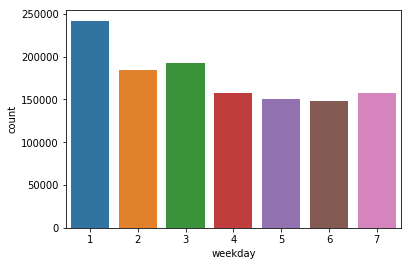

In [20]:
sns.countplot(df["weekday"], data=df)

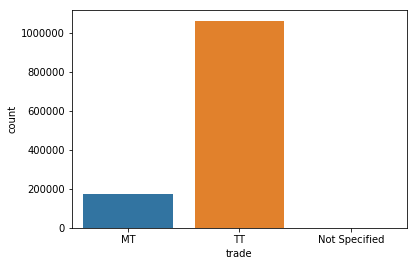

In [21]:
sns.countplot(df["trade"], data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

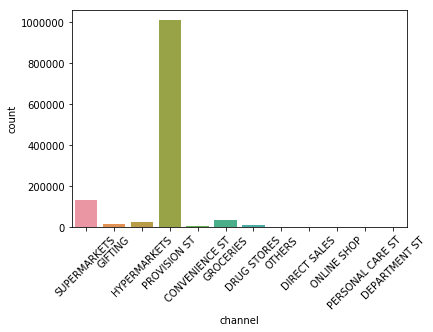

In [22]:
sns.countplot(df["channel"], data=df, height=4, aspect=3)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text xticklabel objects>)

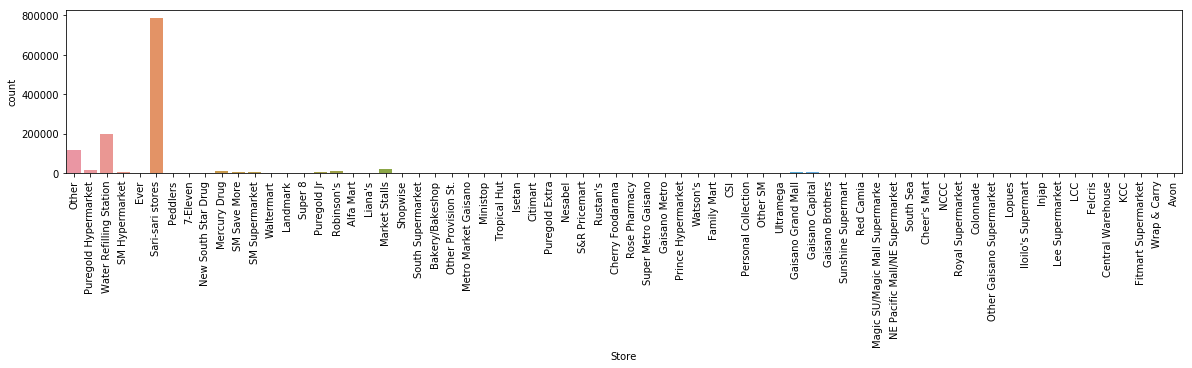

In [43]:
plt.figure(figsize=(20, 3))
sns.countplot(df["Store"], data=df)
plt.xticks(rotation="vertical")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

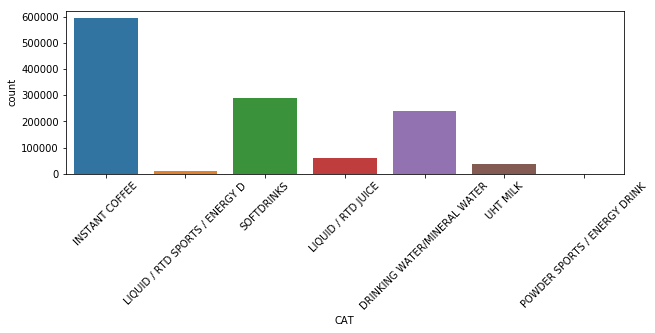

In [45]:
plt.figure(figsize=(10, 3))
sns.countplot(df["CAT"], data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

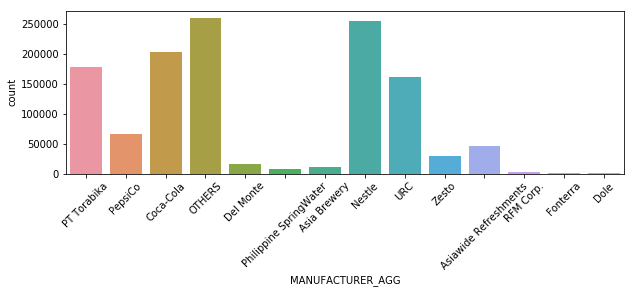

In [47]:
plt.figure(figsize=(10, 3))
sns.countplot(df["MANUFACTURER_AGG"], data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

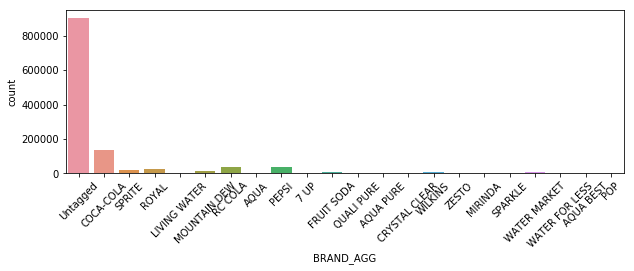

In [48]:
plt.figure(figsize=(10, 3))
sns.countplot(df["BRAND_AGG"], data=df)
plt.xticks(rotation=45)

Model selecting

In [3]:
enc = preprocessing.LabelEncoder()
prod_info = df["SKU_DESC"]
enc.fit(prod_info)
prod_id = enc.transform(prod_info)

In [4]:
df["prod_id"] = prod_id

In [5]:
df_nona = df.dropna()

In [15]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004985 entries, 0 to 1233176
Data columns (total 38 columns):
seqno                   1004985 non-null int64
house                   1004985 non-null int64
weekday                 1004985 non-null int64
trade                   1004985 non-null object
channel                 1004985 non-null object
Store                   1004985 non-null object
Liters_Bought_CORR      1004985 non-null float64
Spend_CORR              1004985 non-null float64
Price_Per_Liter_CORR    1004985 non-null float64
Unit_Size_CORR          1004985 non-null float64
REFID                   1004985 non-null object
CAT                     1004985 non-null object
MANUFACTURER            1004985 non-null object
BRAND                   1004985 non-null object
PACKSIZE                1004985 non-null object
PACKAGE                 1004985 non-null object
FLAVOUR                 1004985 non-null object
VARIANT1                1004985 non-null object
VARIANT2              

Pre-processing the data to use the model

Encoding the data type

In [6]:
def encoder(df):
    for column in df.columns:
        if df[column].dtype == type(object):
            le = preprocessing.LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df
# name_list = ["DEMOG_REGION", "DEMOG_HHSIZE", "DEMOG_HHSEC", "DEMOG_HWAGE", "DEMOG_KIDS", "DEMOG_WORKINGSTATUS", "DEMOG_STRATA", "DEMOG_LIFESTAGE", "trade"]
# dfhouse[name_list] = dfhouse[name_list].astype("category")
# dfhouse.info()
df_encode = encoder(df_nona)

C:\Users\Ted_Liu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Data Normalised

In [39]:
def normalised(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df.values)
    df_new = pd.DataFrame(x_scaled, columns= df.columns)
    return df_new

In [40]:
df_nor_enc = normalised(df_encode)

PCA principal component analysis

In [97]:
ipca = IncrementalPCA(n_components=5)
ipca.fit(df_new)
IncrementalPCA(batch_size=3, copy=True, n_components=5, whiten=False)
ipca.transform(df_new)
# print(ipca.explained_variance_ratio_)
# sum(ipca.explained_variance_ratio_)

array([[ 0.21753097,  1.06584367,  0.73876781, -0.51738974,  0.0278403 ],
       [ 0.21753097,  1.06584367,  0.73876781, -0.51738974,  0.0278403 ],
       [ 0.21753097,  1.06584367,  0.73876781, -0.51738974,  0.0278403 ],
       ...,
       [-0.47513965,  0.0213559 ,  0.12632766,  0.223088  ,  0.6776252 ],
       [-0.47513965,  0.0213559 ,  0.12632766,  0.223088  ,  0.6776252 ],
       [-0.47513965,  0.0213559 ,  0.12632766,  0.223088  ,  0.6776252 ]])

In [7]:
dfhouse = df_nona.loc[:,["house", "CW_1Y",
         "CW_2Y", "DEMOG_REGION", "DEMOG_HHSIZE", "DEMOG_HHSEC", "DEMOG_HWAGE", "DEMOG_KIDS", "DEMOG_WORKINGSTATUS", "DEMOG_STRATA",
         "DEMOG_LIFESTAGE", "trade"]]

# dfhouse = dfhouse.drop_duplicates()

dfhouse.reset_index(drop=True, inplace=True)

In [48]:
x = df_nor_enc.drop(columns = "prod_id")
y = df_nor_enc[["prod_id"]]

Naive Bayes Classification

In [4]:
def naive_bayes_classifier(x, y):
    model = GaussianNB()
    model.fit(x, y)
    return model

In [21]:
train_x, test_x, train_y, test_y = train_test_split(dfhouse, df_encode[["prod_id"]], test_size=0.2, random_state=42)

In [22]:
nb_model = naive_bayes_classifier(train_x, train_y)

C:\Users\Ted_Liu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# pred_y = nb_model.predict(test_x)

In [ ]:
metrics.accuracy_score(test_y, pred_y)

KNN K-Nearest Neighbors Classification

In [8]:
def knn_classifier(x, y):
    model = KNeighborsClassifier()
    model.fit(train_x, train_y)
    return model 

In [9]:
train_x, test_x, train_y, test_y = train_test_split(dfhouse, df_encode["prod_id"], test_size=0.2, random_state=42)

knn_model = knn_classifier(train_x, train_y)

pred_y = knn_model.predict(test_x)

In [10]:
metrics.accuracy_score(test_y, pred_y)

0.30744239963780556

Logistic Regression Classification

In [11]:
def logistic_regression_classifier(train_x, train_y):
    model = LogisticRegression(penalty='l2', solver = "lbfgs", multi_class='auto')
    model.fit(train_x, train_y)
    return model

In [35]:
# train_x, test_x, train_y, test_y = train_test_split(dfhouse, df_nona["prod_id"], test_size=0.2, random_state=42)

# lgr_model = logistic_regression_classifier(train_x, train_y)

# pred_y = lgr_model.predict(test_x)

Random Forest Classifier

In [12]:
def random_forest_classifier(train_x, train_y):
    model = RandomForestClassifier(n_estimators=8)
    model.fit(train_x, train_y)
    return model

In [13]:
rf_model = random_forest_classifier(train_x, train_y)

pred_y = rf_model.predict(test_x)

MemoryError: 

In [ ]:
metrics.accuracy_score(test_y, pred_y)